In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pandas.plotting import lag_plot

# White noise

### White noise

In [3]:
np.random.seed(100)

In [4]:
# Generating with gaussian distribution
noise = np.random.normal(0, 1, 5000)

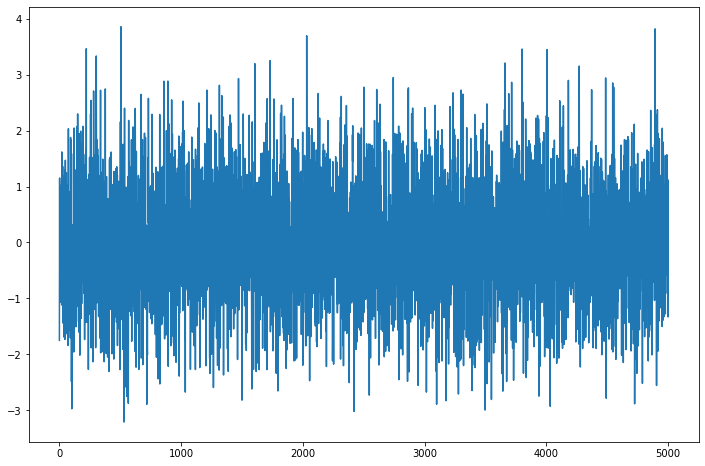

In [5]:
plt.figure(figsize = (12, 8))
plt.plot(noise)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

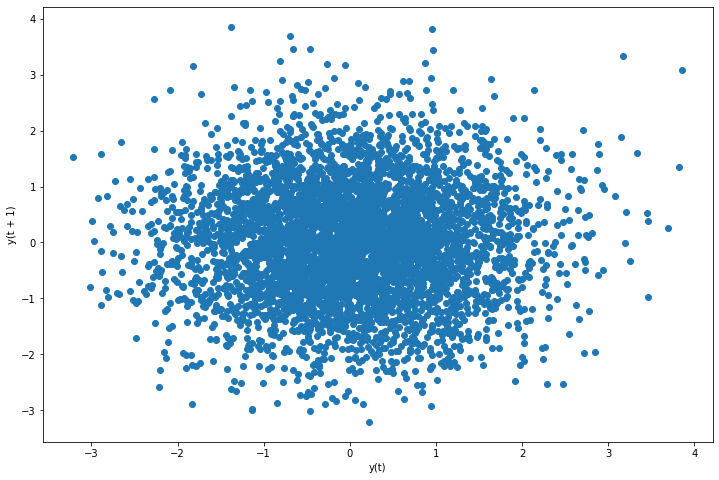

In [6]:
plt.figure(figsize = (12, 8))
lag_plot(pd.DataFrame(noise))

(-0.05, 0.15)

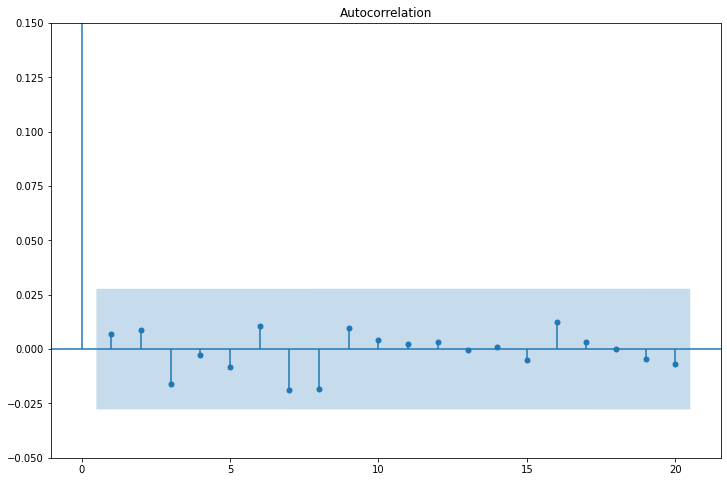

In [7]:
plt.rc("figure", figsize=(12,8))
fig = plot_acf(noise, lags = 20, zero = True)
plt.ylim([-0.05, 0.15])

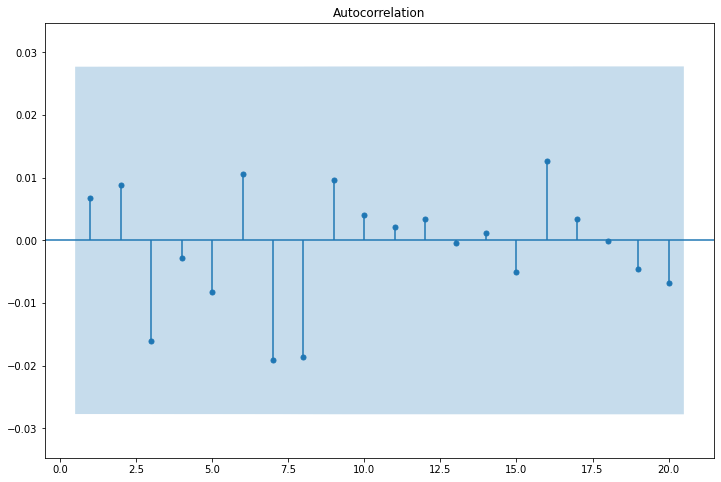

In [8]:
plt.rc("figure", figsize=(12,8))
fig = plot_acf(noise, lags = 20, zero = False, auto_ylims = True)

#### All displayed coefficients (apart from the one for zero lag) are within the confidence interval. We expect that there are no correlations.

#### The null hypothesis for the Ljung-Box test is that the first k autocorrelation coefficients are not statistically different from zero (no correlations)

In [9]:
acorr_ljungbox(noise, lags = [20], return_df = True)

,lb_stat,lb_pvalue
20,8.336363,0.989398


In [10]:
acorr_ljungbox(noise, lags = 20, return_df = True)

,lb_stat,lb_pvalue
1,0.229938,0.631569
2,0.623022,0.732340
3,1.907348,0.591858
4,1.946470,0.745604
5,2.290745,0.807625
6,2.845835,0.827933
7,4.660490,0.701315
8,6.384800,0.604212
9,6.846002,0.653149
10,6.925453,0.732463


### Testing for stationarity - Augumented Dickey-Fuller test

In [11]:
adfuller(noise) # null hypothesis: time series is non-stationary

(-70.23025939421296,
 0.0,
 0,
 4999,
 {'1%': -3.431658793968827,
  '5%': -2.862118345383404,
  '10%': -2.567077853953267},
 14281.458777106282)

#### p value is very low we have to reject the null hypothesis

### Kwiatkowski-Phillips-Schmidt-Shin test

In [12]:
kpss(noise) # null hypothesis: time series is stationary

(0.0753718043007087,
 0.1,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### p value is greater than 0.05 - the hypothesis stands

# Random walks

In [13]:
walk = [0]

for i in range(len(noise)):
    walk.append(walk[-1] + noise[i])

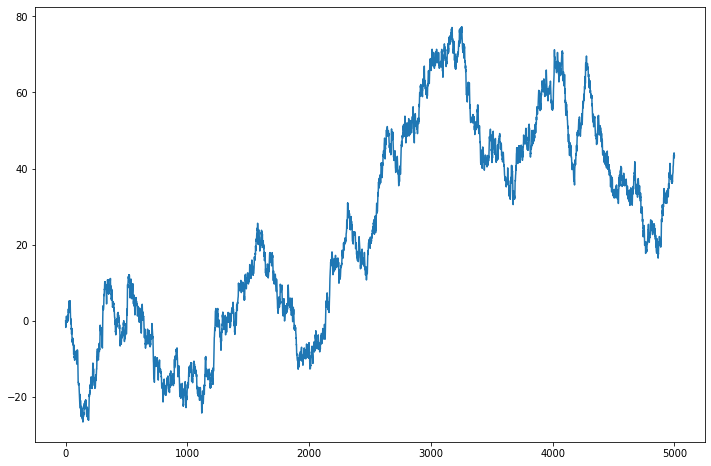

In [14]:
plt.rc("figure", figsize=(12,8))
plt.plot(walk)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

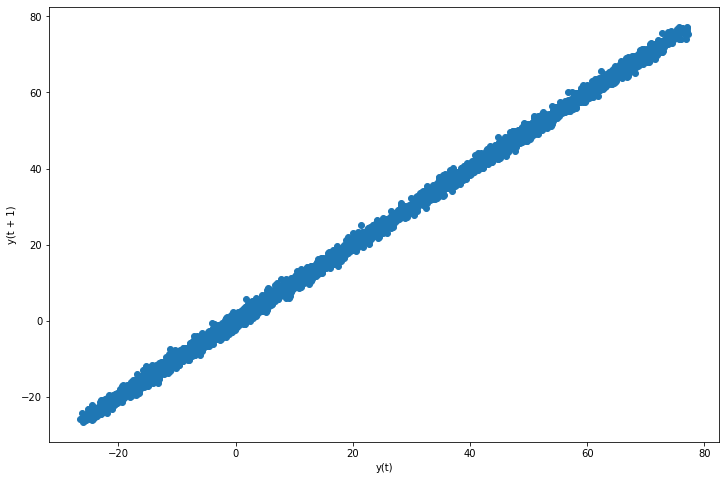

In [15]:
lag_plot(pd.DataFrame(walk))

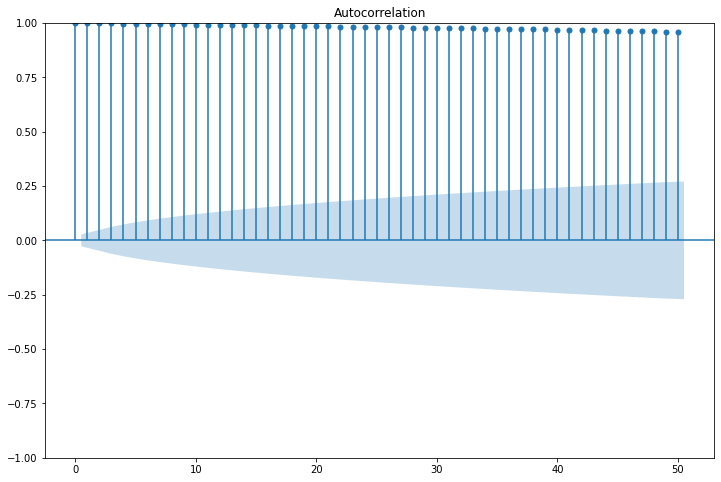

In [16]:
fig = plot_acf(walk, lags = 50)

#### Please note that all corelation coefficients are outside the confidence interval.

In [17]:
acorr_ljungbox(walk, lags = [20], return_df = True) # pvalue = 0 - have to reject null hypothesis (time series strongly correlated)

,lb_stat,lb_pvalue
20,98631.463889,0.0


#### Ljung-Box test corroborates the existence of correlations.

In [18]:
adfuller(walk)

(-1.3446405969248871,
 0.6085099698691661,
 0,
 5000,
 {'1%': -3.431658532075464, '5%': -2.8621182296803203, '10%': -2.56707779236},
 14282.414424011165)

In [19]:
kpss(walk, nlags = 20)

(16.67854878432449,
 0.01,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### Both adf and kpss indicate that random walk is non-stationary

### Random walk with drift

In [20]:
drift_walk = [0]
drift = 0.02

for i in range(len(noise)):
    drift_walk.append(drift_walk[-1] + drift + noise[i])

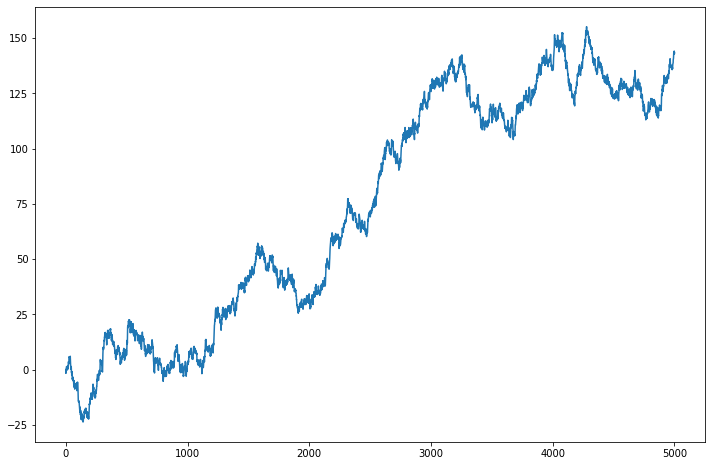

In [21]:
plt.plot(drift_walk)

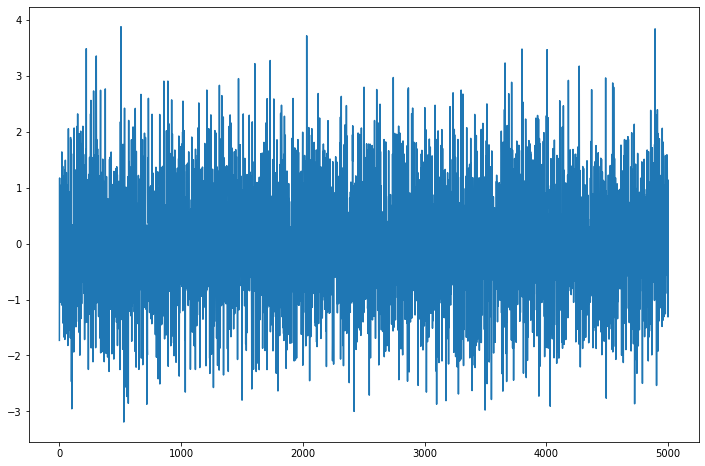

In [22]:
plt.plot(pd.DataFrame(drift_walk).diff())

#### After differencing we recover noise used to generate both walks. Differencing is the simplest invertible method for reducing or eliminating time series nonstationarity.

# Removing nonstationarity

In [23]:
df1 = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df1

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

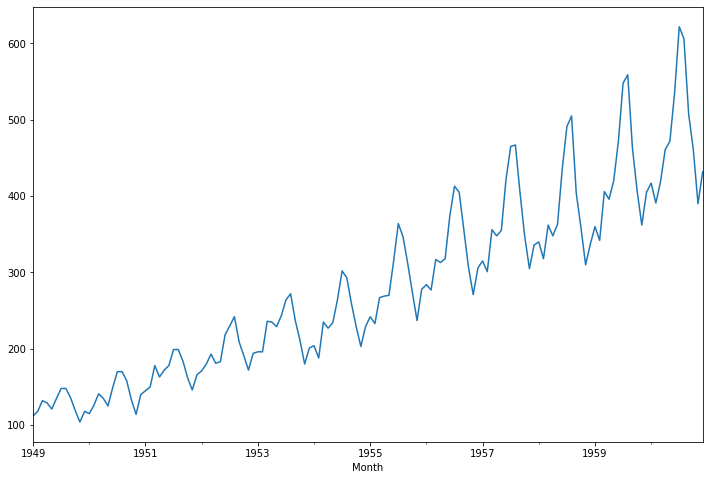

In [24]:
df1['Thousands of Passengers'].plot()

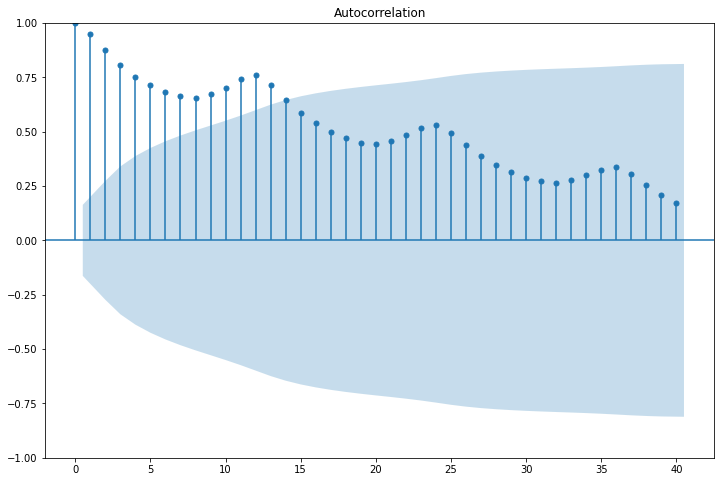

In [25]:
plot_acf(df1['Thousands of Passengers'], lags = 40);

### Removing trend by differenating

In [26]:
df1['dif1'] = df1['Thousands of Passengers'].diff()
df1

,Thousands of Passengers,dif1
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


<AxesSubplot:xlabel='Month'>

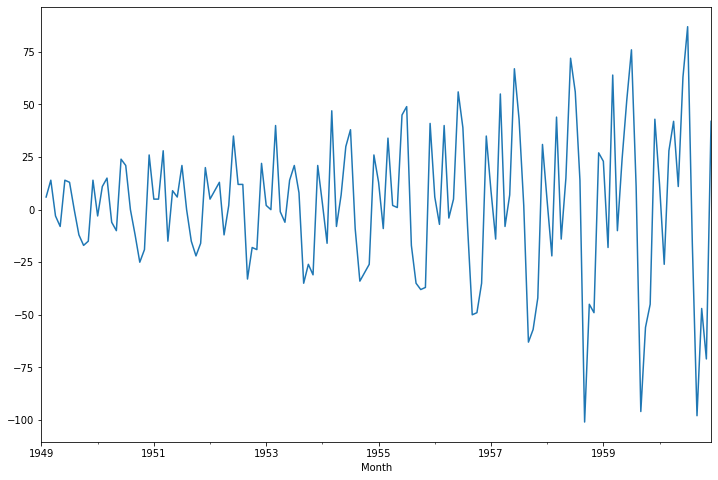

In [27]:
df1['dif1'].plot()

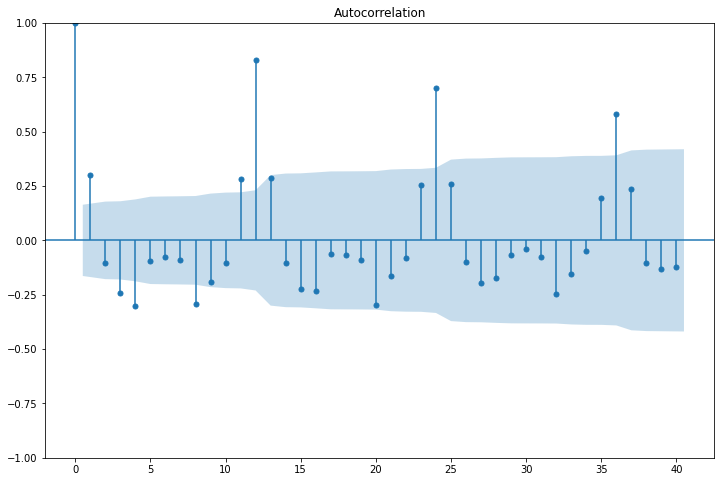

In [28]:
plot_acf(df1['dif1'].dropna(), lags = 40);

### Removing seasonal component by calculating difference between points spaced 12 months apart

In [29]:
df1['dif1_12'] = df1['dif1'].diff(12)
df1

,Thousands of Passengers,dif1,dif1_12
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
...,...,...,...
1960-08-01,606,-16.0,-27.0
1960-09-01,508,-98.0,-2.0
1960-10-01,461,-47.0,9.0


<AxesSubplot:xlabel='Month'>

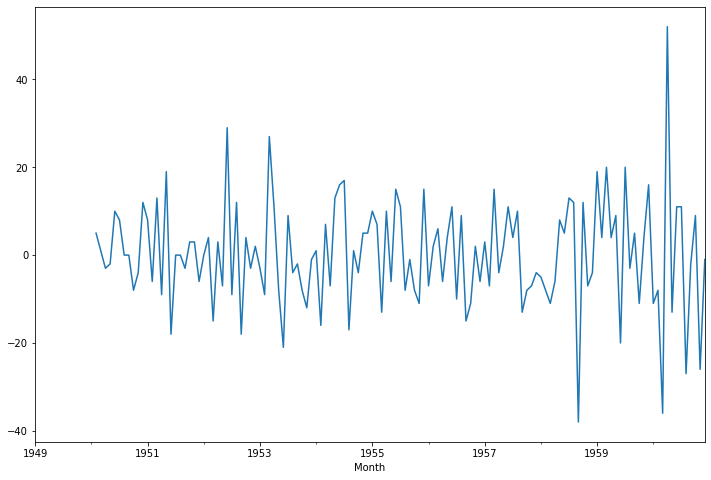

In [30]:
df1['dif1_12'].plot()

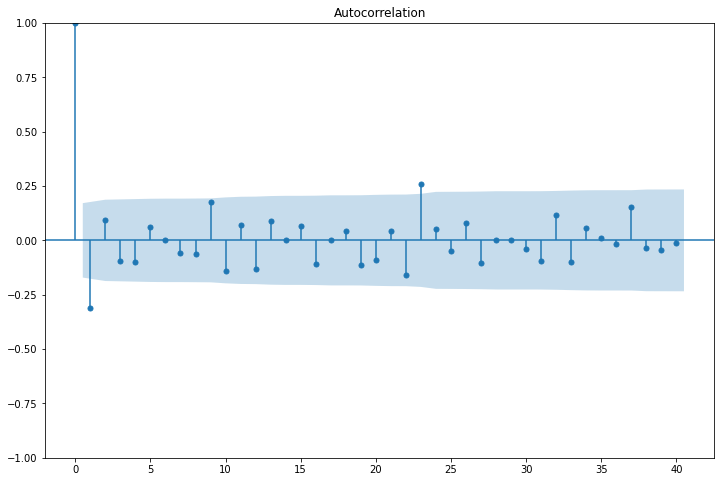

In [31]:
plot_acf(df1['dif1_12'].dropna(), lags = 40);

# AR model

In [32]:
df = pd.read_csv('uspopulation.csv', index_col = 'DATE', parse_dates = True)
df.index.freq = 'MS'
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


<AxesSubplot:xlabel='DATE'>

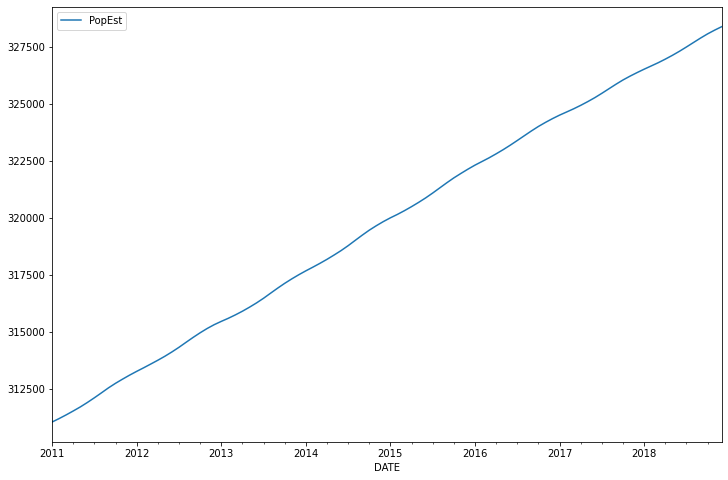

In [33]:
df.plot()

In [34]:
train = df.iloc[:84]
test = df.iloc[84:]

In [36]:
AR1fit = AutoReg(train['PopEst'], lags = 1).fit()